### Student Name: Mudita Garg
### Course: ADTA 5550
### Assignment 4
### Part II: Redesign Convolutional Neural Network (30 Points)

In [1]:
import warnings
warnings.filterwarnings("ignore")
#%tensorflow_version 1.x
import tensorflow as tf

print(tf.__version__)

1.15.5


In [2]:
#Importing the libraries required
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

### Loading the data with one hot encoding

In [3]:
# One-hot encoding is true it means we have loaded the data with one-hot encoding
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print("Number of training examples:", mnist.train.num_examples)
print("Number of testing examples:", mnist.test.num_examples)

Number of training examples: 55000
Number of testing examples: 10000


In [5]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [6]:
#Each image is 28 x 28 pixels, which we can interpret as a big array of numbers. We will flatten this array into a vector of 28x28=784 numbers (this does throw away the 2D structure of the image).

### Visualizing the data, by displaying example of images using matplotlib

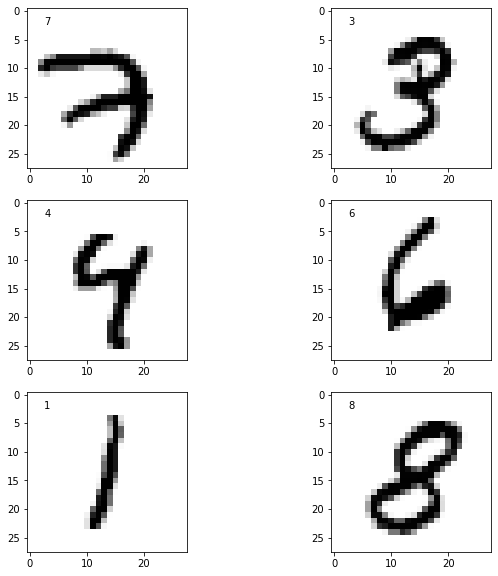

In [7]:
#Having a look at the images of test set
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])

    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

### Initialise Weights in Filters

In [8]:
def initialise_weights(filter_shape):
  init_random_dist = tf.truncated_normal (filter_shape, stddev=0.1)
  return( tf.Variable(init_random_dist))

### Initialise Bias

In [9]:
def initialise_bias(bias_shape):
  initial_bias_vals = tf.constant (0.1,shape=bias_shape)
  return( tf.Variable(initial_bias_vals))

### Set up Convolution Layer and perform computation

In [10]:
def convolution_layer_and_compute(inputs,filter_shape):
  #Initialise the weights in the filter
  filter_initialised_with_weights= initialise_weights(filter_shape)
  #create a convolution layer
  conv_layer_outputs = tf.nn.conv2d(inputs, filter_initialised_with_weights,  strides = [1,1,1,1], padding = 'SAME')
  #return the convolution layer outputs
  return (conv_layer_outputs)

### Set up a ReLu Layer and Perform Computaion 

In [11]:
def create_relu_layer_and_compute(inputs,filter_shape):
  #initialise bias for each input channel
  b= initialise_bias ([filter_shape[3]])
  #perform the computation first by adding: inputs (x*W)+b
  # create a ReLu layer associated with the preeceding convolution layer
  relu_layer_outputs = tf.nn.relu(inputs + b)
  #return the outputs of the ReLu layer
  return(relu_layer_outputs)

### set up a pooling layer and resuce spatial size

In [12]:
def creeate_maxpoolby2_and_Reduce_spatial_size(inputs):
  #create a pooling layer
  pooling_layer_outputs = tf.nn.max_pool(inputs , ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')
  #return the pooling layer
  return(pooling_layer_outputs)

### Set up fully connected layer and perform computation

In [13]:
def create_fully_connected_layer_and_compute(inputs, output_size):
  #get number of inputs channels from the input
  input_size = int(inputs.get_shape()[1])
  #initialise the weights of the filter of the FC layer
  W = initialise_weights([input_size,output_size])
  #initialise the bias: each bias one output channel
  b = initialise_bias([output_size])
  fc_xW_plus_bias_outputs = tf.matmul(inputs,W) + b
  return(fc_xW_plus_bias_outputs)

### Phase 1: Build the CNN

### Create placeholders for inputs and labels:

In [14]:
x = tf.placeholder(tf.float32, shape=[None,784])

In [15]:
y_true = tf.placeholder(tf.float32, [None, 10])

### Reshape the Input Placeholder

In [16]:
x_image = tf.reshape(x,[-1,28,28,1])

### Create 1st Convolution Layer ,ReLu Layer and Perform Computation

In [17]:
conv_layer_1_outputs \
  = convolution_layer_and_compute(x_image, filter_shape=[5,5,1,32])

In [18]:
conv_layer_1_outputs \
  = create_relu_layer_and_compute(conv_layer_1_outputs, filter_shape=[5,5,1,32])

### create 1st pooling layer and reduce spatial size

In [19]:
pooling_layer_1_outputs = creeate_maxpoolby2_and_Reduce_spatial_size(conv_layer_1_outputs)

### Create 2nd Convolution Layer ,ReLu Layer and Perform Computation

In [20]:
# conv_layer_2_outputs \
#   = convolution_layer_and_compute(pooling_layer_1_outputs, filter_shape=[5,5,32,64])

In [21]:
# conv_relu_layer_2_outputs \
#   = create_relu_layer_and_compute(conv_layer_2_outputs,filter_shape=[5,5,32,64])

### Create 2nd Pooling Layer and Reduce Spatial Size

In [22]:
# pooling_layer_2_outputs = creeate_maxpoolby2_and_Reduce_spatial_size(conv_relu_layer_2_outputs)

### Reshaping data making it ready to be fed into 1st FC Layer

In [23]:
pooling_layer_1_outputs_flat = tf.reshape(pooling_layer_1_outputs, [-1,14*14*32])

### Create 1st FC Layer , ReLu Layer and output data 

In [24]:
fc_layer_1_outputs \
  = create_fully_connected_layer_and_compute(pooling_layer_1_outputs_flat, output_size=1024)

In [25]:
fc_relu_layer_1_outputs = tf.nn.relu(fc_layer_1_outputs)

### Create dropout layers 

In [26]:
hold_prob = tf.placeholder(tf.float32)

In [27]:
fc_dropout_outputs = tf.nn.dropout(fc_relu_layer_1_outputs, keep_prob= hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Create Final FC Layer

In [28]:
y_pred = create_fully_connected_layer_and_compute(fc_dropout_outputs, output_size=10)

### Define Loss function

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y_pred, labels=y_true))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Create an Optimizer

In [30]:
optimiser = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

### Create a training CNN Model

### Train and Test CNN 

In [31]:
init = tf.global_variables_initializer()

In [32]:
steps = 5000

In [33]:
with tf.Session() as sess:
  # initialise the variables
  sess.run(init)
  for i in range(steps):
    batch_x, batch_y = mnist.train.next_batch(50)
    _, c = sess.run( [optimiser, cross_entropy],feed_dict={x: batch_x, y_true: batch_y, hold_prob: 0.5})
     # PRINT OUT A MESSAGE EVERY 100 STEPS
    if i%100 == 0:
      print("ON STEP: {}".format(i))
      print('ACCURACY:')
      matches = tf.equal(tf.argmax(y_pred,axis = 1), tf.argmax(y_true,axis= 1))
      acc = tf.reduce_mean(tf.cast(matches,tf.float32))
      test_accuracy = sess.run(acc,feed_dict= {x: mnist.test.images, \
                                               y_true: mnist.test.labels, \
                                               hold_prob: 1.0})
      print(test_accuracy)
      print('\n')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

ON STEP: 0
ACCURACY:
0.0892


ON STEP: 100
ACCURACY:
0.8933


ON STEP: 200
ACCURACY:
0.9278


ON STEP: 300
ACCURACY:
0.9452


ON STEP: 400
ACCURACY:
0.9585


ON STEP: 500
ACCURACY:
0.9644


ON STEP: 600
ACCURACY:
0.9719


ON STEP: 700
ACCURACY:
0.9754


ON STEP: 800
ACCURACY:
0.9768


ON STEP: 900
ACCURACY:
0.9788


ON STEP: 1000
ACCURACY:
0.9787


ON STEP: 1100
ACCURACY:
0.9764


ON STEP: 1200
ACCURACY:
0.979


ON STEP: 1300
ACCURACY:
0.9816


ON STEP: 1400
ACCURACY:
0.9842


ON STEP: 1500
ACCURACY:
0.9817


ON STEP: 1600
ACCURACY:
0.9835


ON STEP: 1700
ACCURACY:
0.9824


ON STEP: 1800
ACCURACY:
0.9859


ON STEP: 1900
ACCURACY:
0.9826


ON STEP: 2000
ACCURACY:
0.9852


ON STEP: 2100
ACCURACY:
0.9848


ON STEP: 2200
ACCURACY:
0.9867


ON STEP: 2300
ACCURACY:
0.9869


ON STEP: 2400
ACCURACY:
0.9864


ON STEP: 2500
ACCURACY:
0.9867


ON STEP: 2600
ACCURACY:
0.9885


ON STEP: 2700
ACCURACY:
0.9872


ON STEP: 2800
ACCURACY:
0.9875


ON STEP: 2900
ACCURACY:
0.9881


ON STEP: 3000
ACCURACY:

In [34]:
print(test_accuracy)


0.9888
